[<img src="https://user-images.githubusercontent.com/79705081/109483674-d3eea600-7a7f-11eb-9a25-58c50da4cde9.png">](http://edenlibrary.ai/)

# Plant Classification-Histogram Equalization-1

## Instructions
1. Clone the repository.
2. Download the necessary datasets from Eden Repository:
   1. Black nightsade-22/MAY/2019-v1
3. Unzip dataset files and remove the zip files.
4. Create a folder called 'eden_data'.
5. Move the unzipped datasets into this folder.
6. The resulting directory structurea should be something similar to:
    * eden_library_notebooks/image_preprocessing/
       * plant_classification-histogram_equalization-1.ipynb
       * eden_data/
           * Black nightsade-220519-Weed-zz-V1-...
7. Install notebook dependencies by running:
    <pre><code>conda env create -f eden_transfer_learning.yml</code></pre>
8. Open the notebook: jupyter notebook
9. Run the code

**Note:** If you find any issues while executing the notebook, don't hesitate to open an issue on Github. We will reply you as soon as possible.

### Background

This notebook aims to provide some initial experience on simple image processing techniques, and to give the used a better understanding on what is an "image" from the aspect of data science. Image processing is one of the rapidly growing technologies of our time and it has become an integral part of the engineering and computer science disciplines. There are many different techniques, such as, histogram equalization, median filter, contrast stretching, , negative image transformation, etc. In this notebook, we will focus on the **histogram equalization** technique. Other techniques could be found in other notebooks found in the Eden Library platform.

**Contrast** is a parameter that expreses how bright and dark pixels are distributed on the pixel. Normally, images with a large number of either very dark or very bright pixels make it hard to distinguish certain features. This is because their pixels values are gathered around certain peaks on the histogram. **Histogram equalization** is a basic image processing technique that adjusts the global contrast of an image by updating the image histogram’s pixel intensity distribution. As a result, areas of low contrast obtain higher contrast in the output image. Because of images taken under real-conditions, the light and dark areas of some images blend together creating a flatter image that could lack enough information for further processing or even reducing the performance of a final classifier. Summing up: The result of applying histogram equalization is an image with higher global contrast.


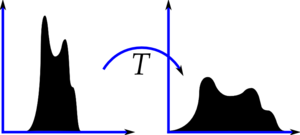

#### Library imports

In [104]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tqdm import tqdm
from glob import glob
import random

#### Auxiliar functions

In [55]:
def plot_sample(X):
    nb_rows = 3
    nb_cols = 3
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(6, 6))

    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(X[random.randint(0, X.shape[0])])

In [105]:
def read_data(path, im_size=(128,128)):
    
    X = []
    
    for im_file in tqdm(glob(path + "*/*")):
        try:
            im = cv2.imread(im_file)
            im = cv2.resize(im, im_size)
            im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
            X.append(im)
        except Exception as e:
            # In case annotations or metadata are found
            print("Not a picture")
    
    X = np.array(X)
    
    return X

In [106]:
def plot_channel_histogram(image, ax):
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()
    ax.plot(cdf_normalized, color = 'b')
    ax.hist(gray.flatten(),256,[0,256], color = 'r')
    ax.legend(('cdf','histogram'), loc = 'upper left')
    
def plot_image_histogram(image, ax):
    color = ('r','g','b')
    for i, col in enumerate(color):
        histr = cv2.calcHist([image],[i],None,[256],[0,256])
        ax.plot(histr,color = col)

#### Experimental constants

In [107]:
IM_SIZE = (256, 256)
IM_PATH = 'eden_data/' # Path to the Eden data

#### Reading and showing pictures
Some of the pictures inside this dataset are **overexposed**. Therefore, we will use histogram equalization to improve the image quality. 

100%|██████████| 124/124 [00:27<00:00,  4.57it/s]


Not a picture


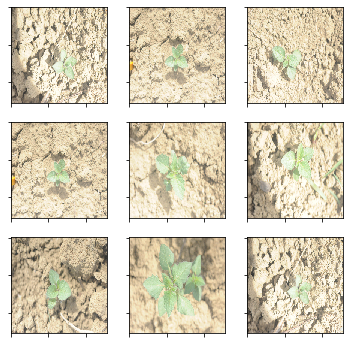

In [108]:
#set the image name
X = read_data(IM_PATH, IM_SIZE)
plot_sample(X)

#### This is the (overexposed) image we will use for computing histrogram equalization

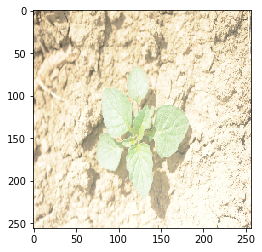

In [110]:
SAMPLE_IMAGE_INDEX = 30
im_sample = X[SAMPLE_IMAGE_INDEX]
plt.imshow(im_sample)
plt.show()

### 1. Grayscale image
In this first example, we will work with a grayscale version of the picture.

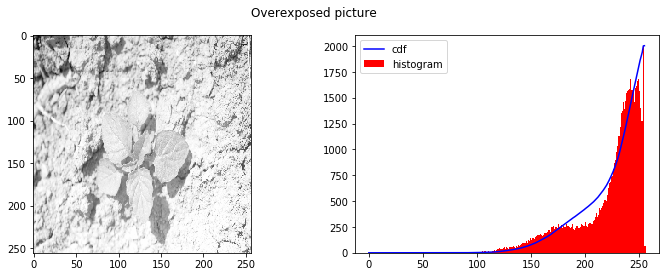

In [111]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle('Overexposed picture')
gray = cv2.cvtColor(im_sample, cv2.COLOR_RGB2GRAY)
ax1.imshow(gray, cmap="gray")
plot_channel_histogram(gray, ax2)
plt.show()

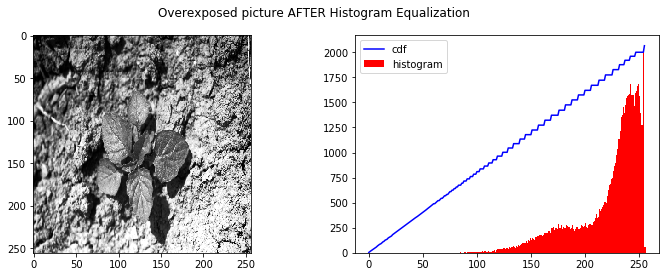

In [112]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle('Overexposed picture AFTER Histogram Equalization')
equ = cv2.equalizeHist(gray)
ax1.imshow(equ, cmap="gray")
plot_channel_histogram(equ, ax2)
plt.show()

### 2. Multi-channel image (RGB)

To perform histogram equalization on a multi-channel image, it is necessary to: 
1. Split the image into its respective channels
2. Equalize each channel, and
3. Merge the channels back together.

#### Original Image

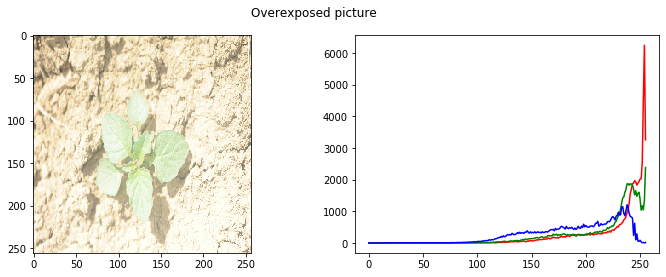

In [113]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle('Overexposed picture')
ax1.imshow(im_sample)

plot_image_histogram(im_sample, ax2)

plt.show()

In [114]:
eqs = []
for i in range(3):
    eqs.append(cv2.equalizeHist(im_sample[:,:,i])[:,:,np.newaxis])
equalized_image = cv2.merge((eqs[0], eqs[1], eqs[2]))

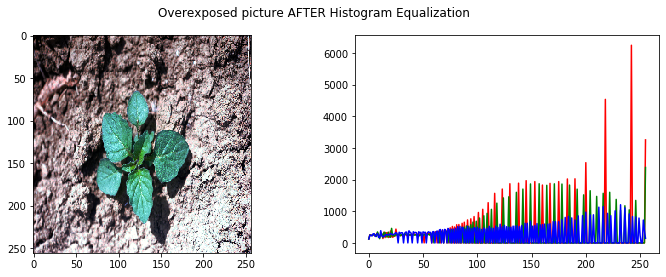

In [115]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle('Overexposed picture AFTER Histogram Equalization')
ax1.imshow(equalized_image)

plot_image_histogram(equalized_image, ax2)
plt.show()

### Bonus: False Colour Images
An image is a multi-layer raster file. Each layer is a 2d matrix with each cell representing the respective pixel in the image (with the same coordinates). Each of these cells contains a numerical value. These numbers are the values recorder by the sensor in this position and for this spectral band. The most common form of imagery is RGB, consisted of three layer for Red, Green and Blue spectra. We can easily get information about the band order and the image resolution with the following commands. 
We can also re-arrange the order that the bands are displayed with. This technique is used by many applications in multispectral data, and is widely reffered to as "pseudo-color", or simply false color composites.

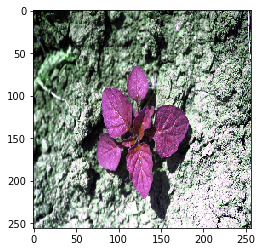

In [67]:
plt.imshow(cv2.merge((eqs[1], eqs[0], eqs[2])))
plt.show()

## Possible Extensions
1. Evaluate the model with other metrics.
2. Try different dropout rates and neurons in the fully-connected part of the network.
3. Try different epochs and batch sizes.

## Bibliography
Bengio, Y., 2012. Deep Learning of Representations for Unsupervised and Transfer Learning. In: Journal of Machine Learning Research; 17–37.

Wang, G., Sun, Y., Wang, J., (2017). Automatic Image-Based Plant Disease Severity Estimation Using Deep Learning. Computational Intelligence and Neuroscience; 2017:8.

Mehdipour-Ghazi, M., Yanikoglu, B.A., & Aptoula, E. (2017). Plant identification using deep neural networks via optimization of transfer learning parameters. Neurocomputing, 235, 228-235.

Suh, H.K., IJsselmuiden, J., Hofstee, J.W., van Henten, E.J., (2018). Transfer learning for the classification of sugar beet and volunteer potato under field conditions. Biosystems Engineering; 174:50–65.

Kounalakis T., Triantafyllidis G. A., Nalpantidis L., (2019). Deep learning-based visual recognition of rumex for robotic precision farming. Computers and Electronics in Agriculture.

Too, E.C., Yujian, L., Njuki, S., & Ying-chun, L. (2019). A comparative study of fine-tuning deep learning models for plant disease identification. Comput. Electron. Agric., 161, 272-279.

Espejo-Garcia, B., Mylonas, N., Athanasakos, L., & Fountas, S., (2020). Improving
Weeds Identification with a Repository of Agricultural Pre-trained Deep Neural
Networks. Computers and Electronics in Agriculture; 175 (August).